In [2]:
# Imports
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation

In [3]:
def cn_schro(tau,N,L,tMax,psi0):
    '''Function to solve the Shrodinger equation with the Crank Nicolson method'''
    hbar=1. # Natural units
    m=1. # Natural units
    h=L/N
    
    # Setup the Hamiltonian
    coeff=-hbar**2/(2.*m*h**2)
    H=diags([coeff,-2*coeff,coeff],[-1,0,1],shape=(N,N)).toarray()
    H[0,-1]=coeff # For PBCs
    H[-1,0]=coeff # Fot PBCs
    H=H*(1j*tau/(2*hbar))
    I=np.identity(N)
    
    # Crank-Nicolson matrix
    CN=np.dot(np.linalg.inv(I+H),(I-H))
    
    # Initialize wavefunction
    psi=np.zeros((tMax,N),dtype='complex')
    psi[0,:]=psi0
    
    # Propagate psi
    for n in range(tMax-1):
        psi[n+1,:]=np.dot(CN,psi[n,:])

    return psi

def wave_packet(x,k0,x0,sig0):
    '''Function for wavepacket'''
    coeff=1./(np.sqrt(sig0*np.sqrt(np.pi)))
    return coeff*np.exp(1j*k0*x)*np.exp(-(x-x0)**2/(2*sig0**2))

<IPython.core.display.Javascript object>


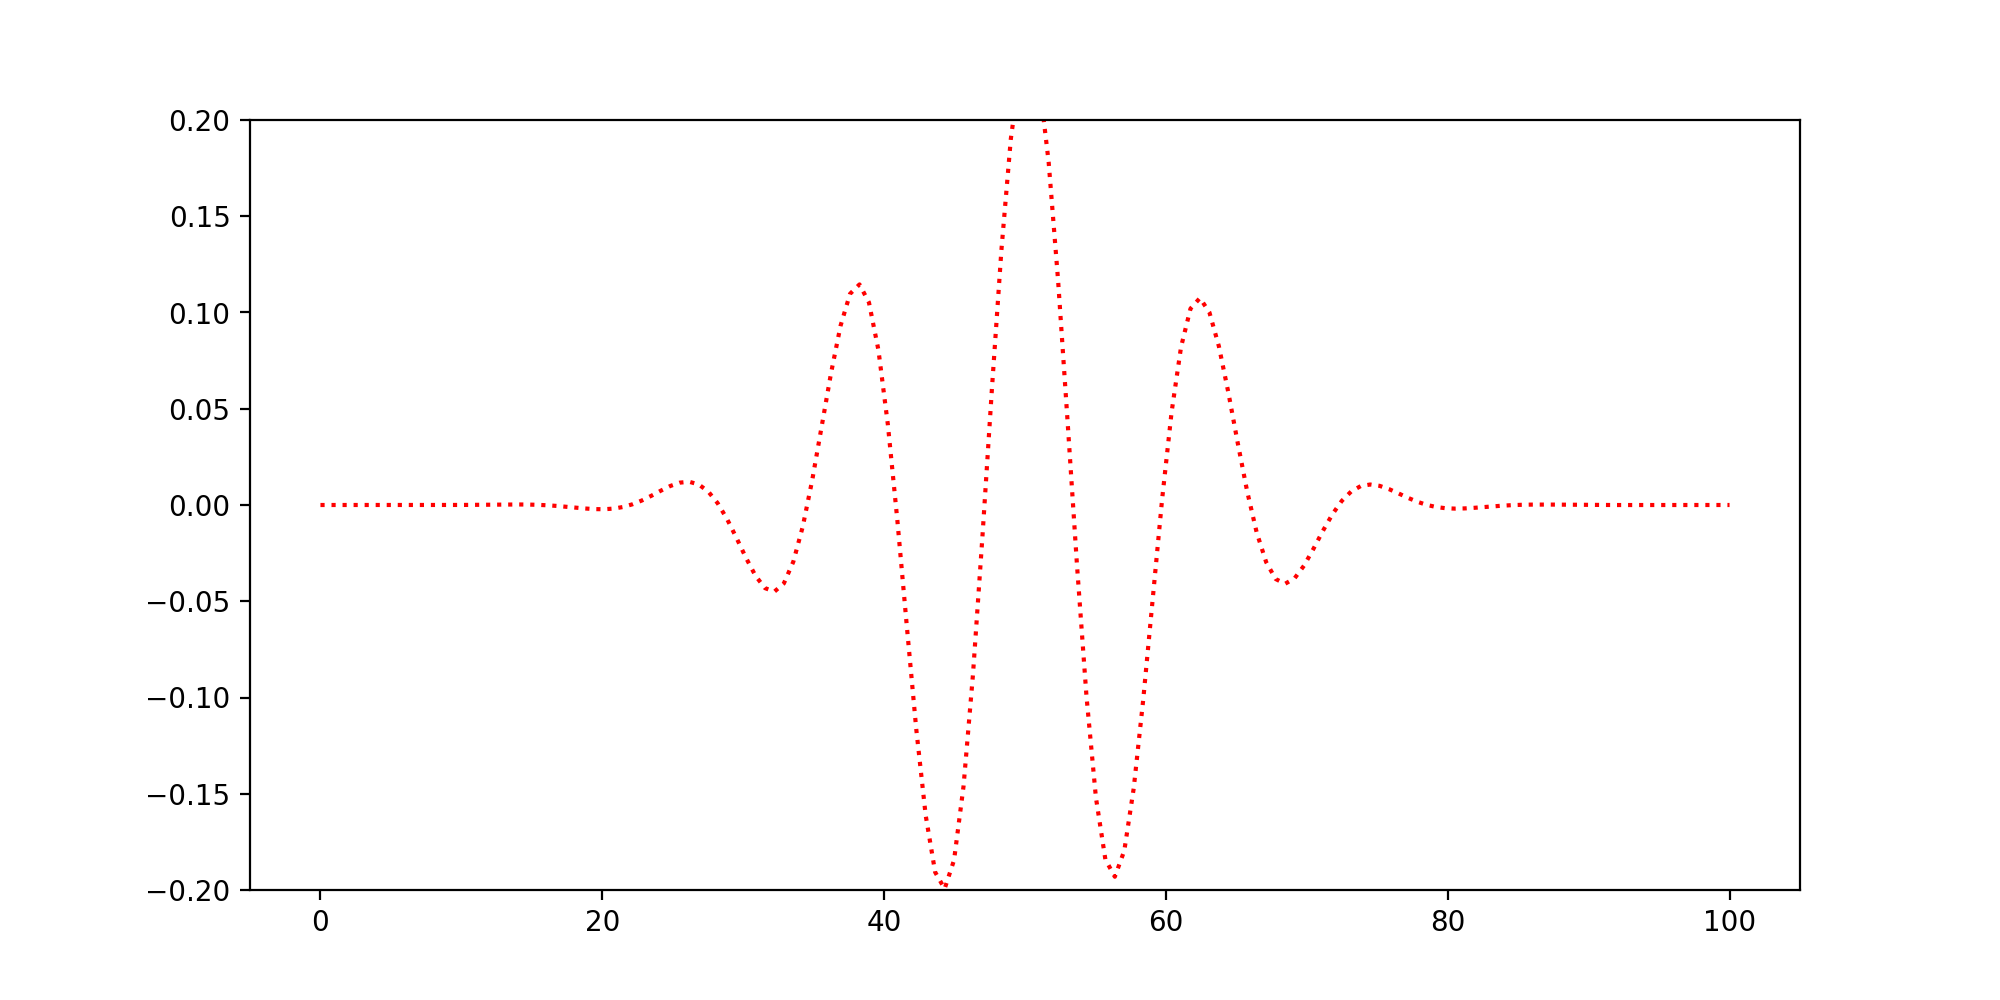

In [4]:
# Enable interactive plot
%matplotlib notebook

# Parameters 
tau=1
N=150
L=100.
velocity=0.5
tMax=int(np.ceil(L/(velocity*tau)))+1 # One period so should come back to itself

# Initialize wavefunction
hbar=1.
mass=1.
x0=L/2.
k0=mass*velocity/hbar
sig0=L/10
x=np.linspace(0,L,N)
psi0=wave_packet(x,k0,x0,sig0)

# Solve for psi up to tMax
psi=cn_schro(tau,N,L,tMax,psi0)

# Make an animated plot
fig1,ax1=plt.subplots(figsize=(10,5))
line,=ax1.plot(x,psi[0,:].real,'r:')
ax1.set_ylim(-0.2,0.2)

rate=3
def animate(i):
    ax1.clear()
    ax1.set_ylim(-0.2,0.2)
    ax1.plot(x,psi[i*rate,:].real,'r')
    ax1.plot(x,psi[i*rate,:].imag,'b')
    ax1.plot(x,psi[0,:].real,'r:')
    ax1.plot(x,psi[0,:].imag,'b:')
    return line,

anim = FuncAnimation(fig1, animate, frames=int(tMax/rate), interval=1,repeat=False,blit=True)


plt.show()

<IPython.core.display.Javascript object>


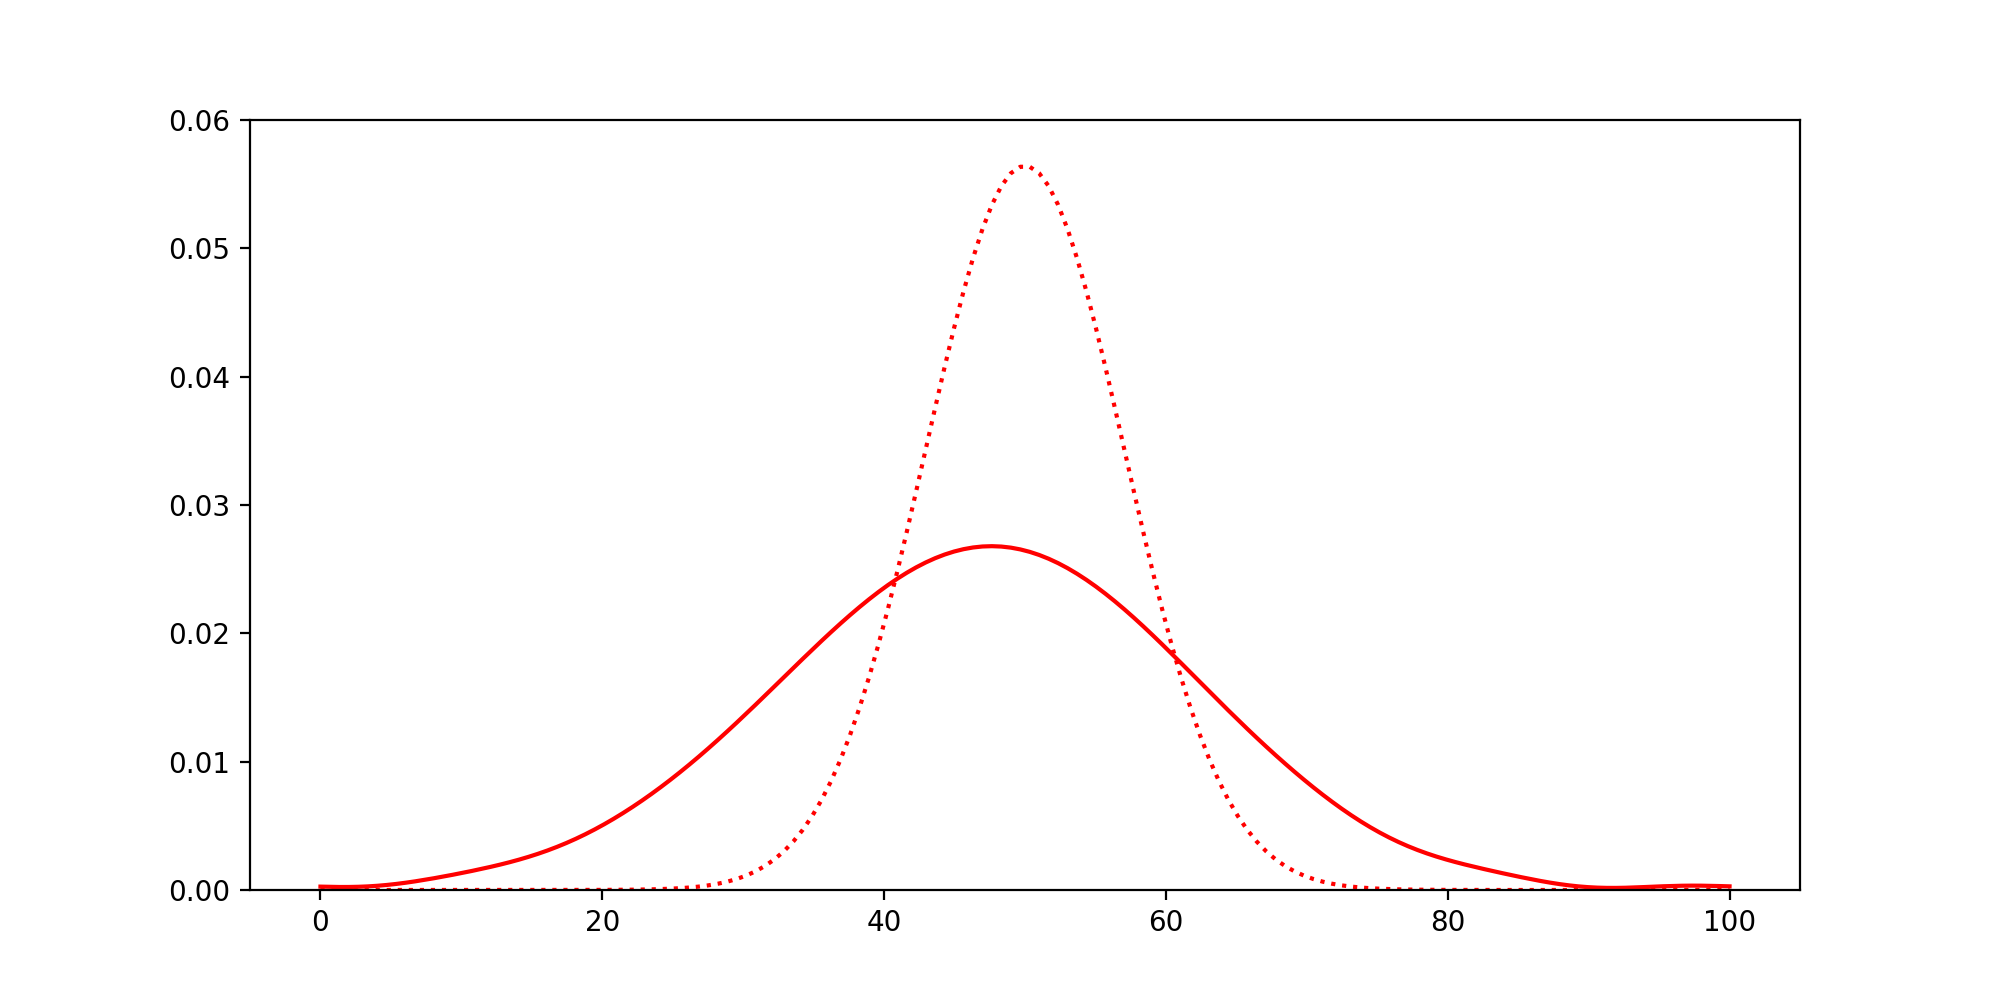

In [15]:
# Make an animated plot of probability density
fig1,ax1=plt.subplots(figsize=(10,5))
line,=ax1.plot(x,np.abs(psi[0,:])**2,'r')
ax1.set_ylim(0,0.06)

rate=3
def animate(i):
    ax1.clear()
    ax1.set_ylim(0,0.06)
    ax1.plot(x,np.abs(psi[i*rate,:])**2,'r')
    ax1.plot(x,np.abs(psi[0,:])**2,'r:')
    return line,

anim = FuncAnimation(fig1, animate, frames=int(tMax/rate), interval=1,repeat=False,blit=True)


plt.show()